In [1]:
import numpy as np
import pandas as pd

In [2]:
dataNode = pd.read_csv('C:\\Users\\work\\Desktop\\tencent\\feature\\net\\node4.csv')
dataLine = pd.read_csv('C:\\Users\\work\\Desktop\\tencent\\feature\\net\\lines.csv')
dataLine = dataLine.drop(dataLine['Source'] == dataLine['Target']) #去掉与自己的连接

In [3]:
dataLine[(dataLine['Source']==91496) & (dataLine['partition']==1)].count()

Source       73
Target       73
weight       73
partition    73
dtype: int64

In [4]:
dataNode1 = dataNode[dataNode['partition']==1]
dataNode0 = dataNode[dataNode['partition']==0]
dataLine1 = dataLine[dataLine['partition']==1]
dataLine0 = dataLine[dataLine['partition']==0]
dataLine10 = dataLine[dataLine['partition']==10]

In [5]:
dataNode[dataNode['partition']==1]['id'].count()

1075

# 对于一个点，求与1、0的平均weight

In [6]:
# 求平均weight
def getWeightAvg(x, part):
    tempDataLine = dataLine[dataLine['partition']==part]
    weight = 0
    count = 0
    if x[1] == part: 
        weight = tempDataLine[tempDataLine['Source']==x[0]]['weight'].sum() + tempDataLine[tempDataLine['Target']==x[0]]['weight'].sum()
        count = tempDataLine[tempDataLine['Source']==x[0]]['weight'].count() + tempDataLine[tempDataLine['Target']==x[0]]['weight'].count()
    else: #来源id的part和标的part不同，说明要从10的线中找
        weight = dataLine10[dataLine10['Source']==x[0]]['weight'].sum() + dataLine10[dataLine10['Target']==x[0]]['weight'].sum()
        count = dataLine10[dataLine10['Source']==x[0]]['weight'].count() + dataLine10[dataLine10['Target']==x[0]]['weight'].count()
    return weight/count
dataNode['weightAvg1'] = dataNode[['id','partition']].apply(getWeightAvg, args=(1,), axis=1)
dataNode['weightAvg0'] = dataNode[['id','partition']].apply(getWeightAvg, args=(0,), axis=1)

In [7]:
# 求总weight
def getWeightAvg(x, part):
    tempDataLine = dataLine[dataLine['partition']==part]
    weight = 0
    allCount = dataNode[dataNode['partition']==x[1]]['id'].count() #统计该类点的数量（而不是有关联的点的数量）
    if x[1] == part: 
        weight = tempDataLine[tempDataLine['Source']==x[0]]['weight'].sum() + tempDataLine[tempDataLine['Target']==x[0]]['weight'].sum()
    else: #来源id的part和标的part不同，说明要从10的线中找
        weight = dataLine10[dataLine10['Source']==x[0]]['weight'].sum() + dataLine10[dataLine10['Target']==x[0]]['weight'].sum()
    return weight/allCount
dataNode['weightSum1'] = dataNode[['id','partition']].apply(getWeightAvg, args=(1,), axis=1)
dataNode['weightSum0'] = dataNode[['id','partition']].apply(getWeightAvg, args=(0,), axis=1)

In [8]:
# 求maxWeight
def getWeightMax(x, part):
    tempDataLine = dataLine[dataLine['partition']==part]
    m = 0.0
    if x[1] == part:
        m = max(tempDataLine[tempDataLine['Source']==x[0]]['weight'].max(), tempDataLine[tempDataLine['Target']==x[0]]['weight'].max()) 
    else: #来源id的part和标的part不同，说明要从10的线中找
        m = max(dataLine10[dataLine10['Source']==x[0]]['weight'].max(), dataLine10[dataLine10['Target']==x[0]]['weight'].max())
    return m
dataNode['weightMax1'] = dataNode[['id','partition']].apply(getWeightMax, args=(1,), axis=1)
dataNode['weightMax0'] = dataNode[['id','partition']].apply(getWeightMax, args=(0,), axis=1)

In [9]:
# 求voteCount
def getVoteCount(x, part):
    tempDataLine = dataLine[dataLine['partition']==part]
    weight = 0
    count = 0
    if x[1] == part: 
        count = tempDataLine[tempDataLine['Source']==x[0]]['weight'].count() + tempDataLine[tempDataLine['Target']==x[0]]['weight'].count()
    else: #来源id的part和标的part不同，说明要从10的线中找
        count = dataLine10[dataLine10['Source']==x[0]]['weight'].count() + dataLine10[dataLine10['Target']==x[0]]['weight'].count()
    return count
dataNode['voteCount1'] = dataNode[['id','partition']].apply(getVoteCount, args=(1,), axis=1)
dataNode['voteCount0'] = dataNode[['id','partition']].apply(getVoteCount, args=(0,), axis=1)

In [10]:
def printPR(field1, field0):
    print '### 1 ###'
    right = dataNode[((dataNode[field1]-dataNode[field0])>0) & (dataNode['partition']==1)]['id'].count()
    allPredict = dataNode[(dataNode[field1]-dataNode[field0])>0]['id'].count()
    allRight = dataNode[dataNode['partition']==1]['id'].count()
    print 'P:' + str(float(right)/allPredict)
    print 'R:' + str(float(right)/allRight)
    print '### 0 ###'
    right = dataNode[((dataNode[field1]-dataNode[field0])<0) & (dataNode['partition']==0)]['id'].count()
    allPredict = dataNode[(dataNode[field1]-dataNode[field0])<0]['id'].count()
    allRight = dataNode[dataNode['partition']==0]['id'].count()
    print 'P:' + str(float(right)/allPredict)
    print 'R:' + str(float(right)/allRight)
    
print '----- weightAvg ------'
printPR('weightAvg1', 'weightAvg0')
print '----- weightSum ------'
printPR('weightSum1', 'weightSum0')
print '----- maxWeight ------'
printPR('weightMax1', 'weightMax0') #数据泄露了
print '----- voteCount ------'
printPR('voteCount1', 'voteCount0')

----- weightAvg ------
### 1 ###
P:0.943579766537
R:0.451162790698
### 0 ###
P:0.976635514019
R:0.398095238095
----- weightSum ------
### 1 ###
P:0.95652173913
R:0.45023255814
### 0 ###
P:0.974770642202
R:0.404761904762
----- maxWeight ------
### 1 ###
P:1.0
R:0.337674418605
### 0 ###
P:1.0
R:0.00285714285714
----- voteCount ------
### 1 ###
P:0.946830265849
R:0.430697674419
### 0 ###
P:0.947126436782
R:0.392380952381


In [11]:
def getMinus(x):
    minus = x[0] - x[1]
    sum = x[0] + x[1]
#     sum = 1
    if minus == 0:
        return 0
    else:
        return minus/sum
def getV(x):
    if x[0] > 0: 
        return 1
    elif x[0] < 0: 
        return -1
    else:
        return 0
out = dataNode[['id','weightAvg1','weightAvg0','partition']].copy()
out['appID'] = 83
out['voteMinus'] = out[['weightAvg1', 'weightAvg0']].apply(getMinus, axis=1)
out['v'] = out[['voteMinus']].apply(getV, axis=1)
out.rename(columns={'id':'userID','weightAvg1':'voteP', 'weightAvg0':'voteN'}, inplace=True)

In [12]:
out.head()

,userID,voteP,voteN,partition,appID,voteMinus,v
0,359757,0.330099,0.328619,1,83,0.002246,1
1,91496,0.366976,0.342557,1,83,0.034416,1
2,491729,0.367875,0.348703,1,83,0.026754,1
3,2439324,0.000000,0.000000,1,83,0.000000,0
4,473013,0.000000,0.000000,1,83,0.000000,0


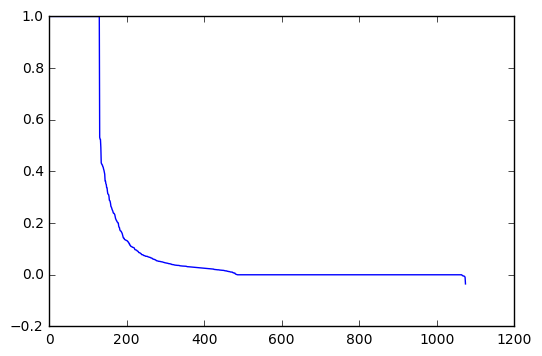

In [13]:
import matplotlib.pyplot as plt
temp = out[out['partition']==1][['voteMinus']].sort_values(by='voteMinus',ascending=False)
plt.plot(range(len(temp)), temp)
plt.show()

In [14]:
out[(out['v']==0) & (out['voteP']!=0)]

,userID,voteP,voteN,partition,appID,voteMinus,v
58,6261,0.664038,0.664038,0,83,0.0,0


In [15]:
# out[out['userID']==359757]
dataNode[dataNode['id']==91496]

,id,partition,degree,weighted degree,weightAvg1,weightAvg0,weightSum1,weightSum0,weightMax1,weightMax0,voteCount1,voteCount0
1,91496,1,126,45.654323,0.366976,0.342557,0.025262,0.017208,1.0,0.484673,74,54


In [ ]:
out.to_csv('C:\\Users\\work\\Desktop\\tencent\\feature\\user_vote.csv',index=False)